# 1 - Name

Name:Suma Bimantoro Andru

Dataset: Diabetes

Objective:<b>model Classification outcome Prediction </b>

# 2 - Import Libraries

In [5]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer


# 3 - Data Loading

In [6]:
# Load Dataset

data = pd.read_csv('diabetes.csv')

In [7]:
#Tampilkan Head
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [8]:
#Tampilkan Tail
data.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
# Duplicate Dataset

data_copy = data.copy()

In [10]:
#tampilkan informasi untuk melihat field
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<p>In this dataset there are <b>9</b> columns and <b>768</b> rows, all data types are <b>numeric</b></p>

In [11]:
#check dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<p>It can be seen from the <b>median</b> value is <b>29</b>, which means that many <b>ages 29</b> and the youngest age is <b>21</b>< /p>

<h1><b>C-MAP</b></h1>

In [12]:
#melihat corelasi dengan c-map
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

#Correlation Between Numeric Columns
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<p>Seeing the correlation, it is the same as the researcher's visualization of death above at the time of data introduction,
The following features will be selected later.</p>
<li> Pregnancies
<li> Glucose 
<li> Insulin
<li> BMI
<li> DiabetesPedigreeFunction
<li> Age


# 5 - Data Preprocessing

This section contains the process of preparing data for the model training process, such as dividing data into train-dev-test, data transformation (normalization, encoding, etc.), and other processes needed.

## Get data for model inference

In [13]:
## Get data for model inference
data_inf = data.sample(20, random_state=17)
data_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
649,0,107,60,25,0,26.4,0.133,23,0
516,9,145,88,34,165,30.3,0.771,53,1
151,4,114,65,0,0,21.9,0.432,37,0
381,0,105,68,22,0,20.0,0.236,22,0
325,1,157,72,21,168,25.6,0.123,24,0
473,7,136,90,0,0,29.9,0.210,50,0
736,0,126,86,27,120,27.4,0.515,21,0
300,0,167,0,0,0,32.3,0.839,30,1
662,8,167,106,46,231,37.6,0.165,43,1
484,0,145,0,0,0,44.2,0.630,31,1


In [14]:
# remove inference set from data set
data_train_test = data.drop(data_inf.index)
data_train_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
#reset index to reduce error
data_train_test.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,107,60,25,0,26.4,0.133,23,0
1,9,145,88,34,165,30.3,0.771,53,1
2,4,114,65,0,0,21.9,0.432,37,0
3,0,105,68,22,0,20.0,0.236,22,0
4,1,157,72,21,168,25.6,0.123,24,0
5,7,136,90,0,0,29.9,0.210,50,0
6,0,126,86,27,120,27.4,0.515,21,0
7,0,167,0,0,0,32.3,0.839,30,1
8,8,167,106,46,231,37.6,0.165,43,1
9,0,145,0,0,0,44.2,0.630,31,1


## Splitting between `X` (Features) and `y` (Target)

In [16]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('Outcome', axis=1)
y = data_train_test['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
743,10,101,76,48,180,32.9,0.171,63
744,2,122,70,27,0,36.8,0.340,27
745,5,121,72,23,112,26.2,0.245,30
746,1,126,60,0,0,30.1,0.349,47


In [17]:
# Split between Train-Set and Test-Set 80% dan 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (598, 8)
Test Size  :  (150, 8)


## Handling outliers

In [18]:
#membuat fungsi IQR untuk deteksi outlier, dipakai jika data itu skew
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [19]:
#membuat fungsi untuk deteksi outlier, dipakai jika data itu tidak skew atau distribusi normal
def find_normal_boundaries(X_train, variable):
    upper_boundary = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary = X_train[variable].mean() - 3 * X_train[variable].std()

    return upper_boundary, lower_boundary

<b><h1>Pregnancies</h1></b>

In [20]:
#Cek Skew
data['Pregnancies'].skew()

0.9016739791518588

skew

<b><h1>Glucose</h1></b>

In [21]:
data['Glucose'].skew()

0.17375350179188992

not skew

<b><h1>Insulin</h1></b>

In [22]:
#Cek Skew
data['Insulin'].skew()

2.272250858431574

skew

<b><h1>BMI</h1></b>

In [23]:
#Cek Skew
data['BMI'].skew()

-0.42898158845356543

not skew

DiabetesPedigreeFunction

In [24]:
#Cek Skew
data['DiabetesPedigreeFunction'].skew()

1.919911066307204

skew

Age

In [25]:
#Cek Skew
data['Age'].skew()

1.1295967011444805

skew

## Handling missing Value

In [26]:
# Check Missing Values in `X_train`
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [27]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [28]:
# Check Missing Values in `y_train`

y_train.isnull().sum()

0

In [29]:
# Check Missing Values in `y_test`

y_test.isna().sum()

0

<b><h1>There is no missing value in X or y</h1></b>

## Feature Selection

In [30]:
#display Xtrain
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
644,9,145,80,46,130,37.9,0.637,40
418,0,94,0,0,0,0.0,0.256,25
565,2,197,70,99,0,34.7,0.575,62
48,7,103,66,32,0,39.1,0.344,31
201,2,99,70,16,44,20.4,0.235,27
...,...,...,...,...,...,...,...,...
406,0,138,60,35,167,34.6,0.534,21
390,3,82,70,0,0,21.1,0.389,25
143,10,108,66,0,0,32.4,0.272,42
241,6,119,50,22,176,27.1,1.318,33


In [31]:
# membuat df bedasarkan Feature selection

X_train_new=X_train[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X_test_new=X_test[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X_train_new

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
644,9,145,130,37.9,0.637,40
418,0,94,0,0.0,0.256,25
565,2,197,0,34.7,0.575,62
48,7,103,0,39.1,0.344,31
201,2,99,44,20.4,0.235,27
...,...,...,...,...,...,...
406,0,138,167,34.6,0.534,21
390,3,82,0,21.1,0.389,25
143,10,108,0,32.4,0.272,42
241,6,119,176,27.1,1.318,33


In [32]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical Columns :  []


## Pipeline

In [33]:
#divide num by skew and normal, cat by ordinal and none
num_normal = ['Glucose','BMI']
num_skew = ['Pregnancies','Insulin','DiabetesPedigreeFunction','Age']

In [34]:
#persiapkan column transformer untuk membedakan proses per kolom
preprocess = ColumnTransformer([
    ('numnormal', StandardScaler(),num_normal),
    ('numskew', MinMaxScaler(),num_skew)
  ])

In [35]:
# Fit and Transform

X_train_pipline = preprocess.fit_transform(X_train)
X_test_pipline = preprocess.transform(X_test)
X_train_pipline.shape

(598, 6)

# 6 - Model Definition

In [36]:
#mendefinisikan model

ranfor= RandomForestClassifier()






# 7 - Model Training

In [37]:
#Random Forest
%timeit ranfor.fit(X_train_pipline, y_train)

424 ms ± 37.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 8 - Model Evaluation

researchers will do with the validation score and accuracy

##Random Forest

In [38]:
#Define variable untuk memakai Cross_val_score
scores_ranfor = cross_val_score(ranfor, X_train_pipline, y_train,cv=5)

In [39]:
#memakai method mean() untuk mencari mean
scores_ranfor.mean()

0.7692156862745098

In [40]:
#memakai method std() untuk mencari std
scores_ranfor.std()

0.018921594544535843

##<b><h1>Scoring Results</h1></b>

In [41]:
#define variable dan melakukan predict bagi data test dan data train


#RandomForestClassifier()
y_pred_train_ranfor = ranfor.predict(X_train_pipline)
y_pred_test_ranfor = ranfor.predict(X_test_pipline)

In [42]:
#Menampilkan acc_score di semua model algoritma yang sudah kita definisikan
print('-----TRAIN-----')

print('accuracy score train RandomForestClassifier : ',accuracy_score(y_train,y_pred_train_ranfor))


print('-----TEST-----')

print('accuracy score train RandomForestClassifier : ',accuracy_score(y_test,y_pred_test_ranfor))



-----TRAIN-----
accuracy score train RandomForestClassifier :  1.0
-----TEST-----
accuracy score train RandomForestClassifier :  0.7466666666666667


In [43]:

print('')
print (f'Model Random Forest Mean :{scores_ranfor.mean()}')
print (f'Model Random Forest STD :{scores_ranfor.std()}')




Model Random Forest Mean :0.7692156862745098
Model Random Forest STD :0.018921594544535843


the validation score here is set cv=5 which means check at 5 metrics

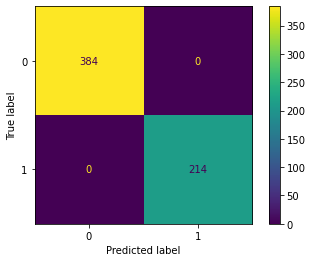

In [44]:
#y_train predict randfor
cm = confusion_matrix(y_train, y_pred_train_ranfor, labels=ranfor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ranfor.classes_)

disp.plot()
plt.show()

- From the analysis above, it is found that y_train makes perfect predictions where there are no errors

In [45]:
#randfor
print(classification_report(y_train,y_pred_train_ranfor))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       214

    accuracy                           1.00       598
   macro avg       1.00      1.00      1.00       598
weighted avg       1.00      1.00      1.00       598



##Hyperparameter assignment

In [46]:
#define dari parameter manual
ranfortuning= RandomForestClassifier(n_estimators=86, max_depth=18)



In [47]:
#make a fit
ranfortuning.fit(X, y)

RandomForestClassifier(max_depth=18, n_estimators=86)

random forest after tuning

In [48]:
#validation score setelah model di tuning
scores_ranfortuning = cross_val_score(ranfortuning, X_train_pipline, y_train,cv=5)

In [49]:
#melihat mean dari hasil validation model setelah di tuning
scores_ranfortuning.mean()

0.7575350140056022

In [50]:
#melihat std dari hasil validation model setelah di tuning
scores_ranfortuning.std()

0.024230768584098165

#9-Model Inference

In [51]:
#reset index data inference
data_inf = data_inf.reset_index(drop=True)
data_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,107,60,25,0,26.4,0.133,23,0
1,9,145,88,34,165,30.3,0.771,53,1
2,4,114,65,0,0,21.9,0.432,37,0
3,0,105,68,22,0,20.0,0.236,22,0
4,1,157,72,21,168,25.6,0.123,24,0
5,7,136,90,0,0,29.9,0.210,50,0
6,0,126,86,27,120,27.4,0.515,21,0
7,0,167,0,0,0,32.3,0.839,30,1
8,8,167,106,46,231,37.6,0.165,43,1
9,0,145,0,0,0,44.2,0.630,31,1


##Inference Preprocessing

In [52]:
inference_final = preprocess.fit_transform(data_inf)

##Predicition


In [53]:
y_pred_inf = ranfor.predict(inference_final)

In [54]:
#rubah ke dataframe
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['random forest'])

In [55]:
#Buat dataframe prediction
predictions = pd.concat([data_inf['Outcome'], y_pred_inf], axis=1)
predictions.columns = ['Actual','prediction']
predictions

,Actual,prediction
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,1,1
8,1,1
9,1,1


Miss one from 20 data inference